## Suprise Housing , house price evaluation model using Linear, Ridge and Lasso Regression

The solution is divided into the following sections: 
- Data understanding and exploration
- Data cleaning
- Data preparation
- Model building and evaluation
- Improvise test data set score and drop coefficients using Regularization
- Also check if Grid search CV helps in simpliflying the model for same r2 score.

### 1. Import the required libraries

since , it is a multi linear regression needing accuracy management , regularization etc.. let's import all needed ones.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

### 2. Data Understanding and Exploration

Let's first have a look at the dataset and understand the size, attribute names etc.

In [2]:
# reading the dataset
houses = pd.read_csv("train.csv")

In [3]:
# summary of the dataset: 1460 rows, 81 columns, no null values
print(houses.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
# head
houses.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### 3. Understanding the Data Dictionary and Data cleaning

The data dictionary contains the meaning of various attributes; some non-obvious ones are:

In [5]:
houses.describe()
# as per houses.info() , we see 38 numeric columns , we see same in describe 

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
### Lets check for variables which has NAN values only , if no output , there is none
houses_nan=houses.isnull().all()
for i in houses_nan.keys():
    if houses_nan.loc[i]:
        print (i)

### Lets find the percentage of the zero and null values in different columns 

In [7]:
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
        return mz_table

missing_zero_values_table(houses)

Your selected dataframe has 81 columns and 1460 Rows.
There are 19 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
PoolQC,0,1453,99.5,1453,99.5,object
MiscFeature,0,1406,96.3,1406,96.3,object
Alley,0,1369,93.8,1369,93.8,object
Fence,0,1179,80.8,1179,80.8,object
FireplaceQu,0,690,47.3,690,47.3,object
LotFrontage,0,259,17.7,259,17.7,float64
GarageType,0,81,5.5,81,5.5,object
GarageYrBlt,0,81,5.5,81,5.5,float64
GarageFinish,0,81,5.5,81,5.5,object
GarageQual,0,81,5.5,81,5.5,object


In [8]:
# we may need to add proper value for Null values in certain columns such as "PoolQC","MiscFeature","Alley","Fence","FireplaceQu","GarageType",BsmtExposure,BsmtFinType2,BsmtQual,BsmtCond,BsmtFinType1
houses['PoolQC'].fillna("No Pool",inplace=True)
houses['MiscFeature'].fillna("None",inplace=True)
houses['Alley'].fillna("No Alley",inplace=True)
houses['Fence'].fillna("No Fence",inplace=True)
houses['FireplaceQu'].fillna("No Fireplace",inplace=True)
houses['GarageType'].fillna("No Garage",inplace=True)
houses['BsmtQual'].fillna("No Basement",inplace=True)
houses['BsmtCond'].fillna("No Basement",inplace=True)
houses['BsmtFinType2'].fillna("No Basement",inplace=True)
houses['BsmtFinType1'].fillna("No Basement",inplace=True)
houses['BsmtExposure'].fillna("No Basement",inplace=True)
houses['MasVnrType'].fillna("None",inplace=True)
houses['Electrical'].fillna(houses['Electrical'].mode(),inplace=True)

In [9]:
# we need to handle GarageYrBlt as null value , since it is year , we cannot fill it with a logical value. Lets see what is the value of other garage parameters when garageYrblt is null
houses[houses['GarageYrBlt'].isnull()][['GarageFinish','GarageQual','GarageCond']]

,GarageFinish,GarageQual,GarageCond
39,NaN,NaN,NaN
48,NaN,NaN,NaN
78,NaN,NaN,NaN
88,NaN,NaN,NaN
89,NaN,NaN,NaN
...,...,...,...
1349,NaN,NaN,NaN
1407,NaN,NaN,NaN
1449,NaN,NaN,NaN
1450,NaN,NaN,NaN


In [10]:
# since most of related Garage parameters are also null, lets drop those 81 rows to avoid confusion with null values.
houses=houses[houses['GarageYrBlt'].notna()]

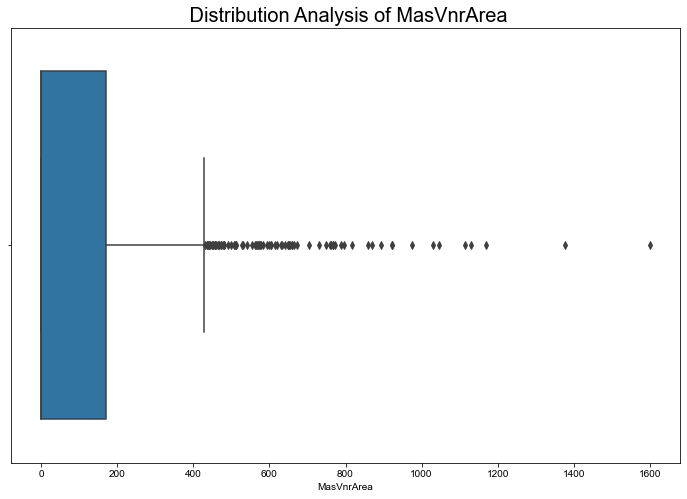

In [11]:
# we have handle the missing values of some variables using mean or median value if it makes sense 
plt.figure(figsize=[12,8])
sns.boxplot(houses['MasVnrArea'])
sns.set(font_scale=1) # font size 2
plt.title(" Distribution Analysis of MasVnrArea" , fontsize=20)
plt.savefig("MasVnrArea_analysis.png",bbox_inches='tight', dpi=300)
plt.show()

In [12]:
# fill it with median
houses['MasVnrArea'].fillna(houses['MasVnrArea'].median() , inplace=True)

In [13]:
houses['LotFrontage'].describe()

count    1127.000000
mean       70.683230
std        24.261598
min        21.000000
25%        60.000000
50%        70.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

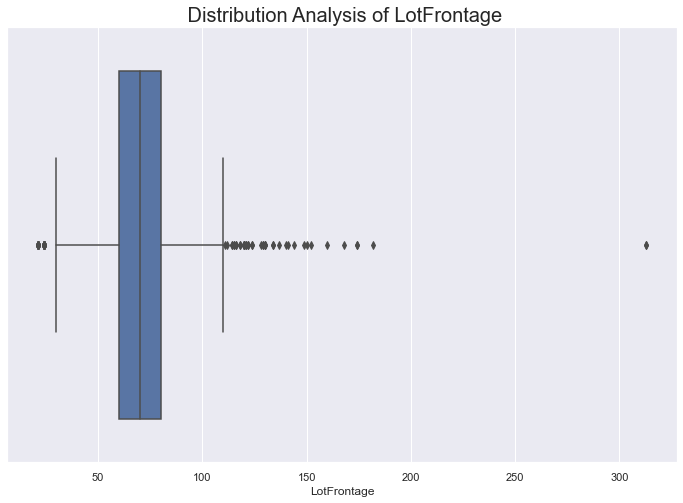

In [14]:
# we have handle the missing values of some variables using mean or median value if it makes sense 
plt.figure(figsize=[12,8])
sns.boxplot(houses['LotFrontage'])
sns.set(font_scale=1) # font size 2
plt.title(" Distribution Analysis of LotFrontage" , fontsize=20)
plt.savefig("LotFrontAge_analysis.png",bbox_inches='tight', dpi=300)
plt.show()

In [15]:
# fill it with median
houses['LotFrontage'].fillna(float(houses['LotFrontage'].median()) , inplace=True)

In [16]:
## Since we have lots of numerical variable , lets check their heatmap correlation with price before planning to include them
non_categorical_columns=houses.select_dtypes(exclude=['object']).columns.tolist()
print (len(non_categorical_columns))
print (non_categorical_columns)

38
['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [17]:
## Lets draw heatmap btw different variables and SalePrice to get a view on correlation
corr_columns1=houses[['SalePrice','MSSubClass','LotFrontage','LotArea','OverallQual','OverallCond', 'MasVnrArea','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF','1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces','GarageArea','GarageCars']]
corr_matrix=corr_columns1.corr()

In [18]:
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

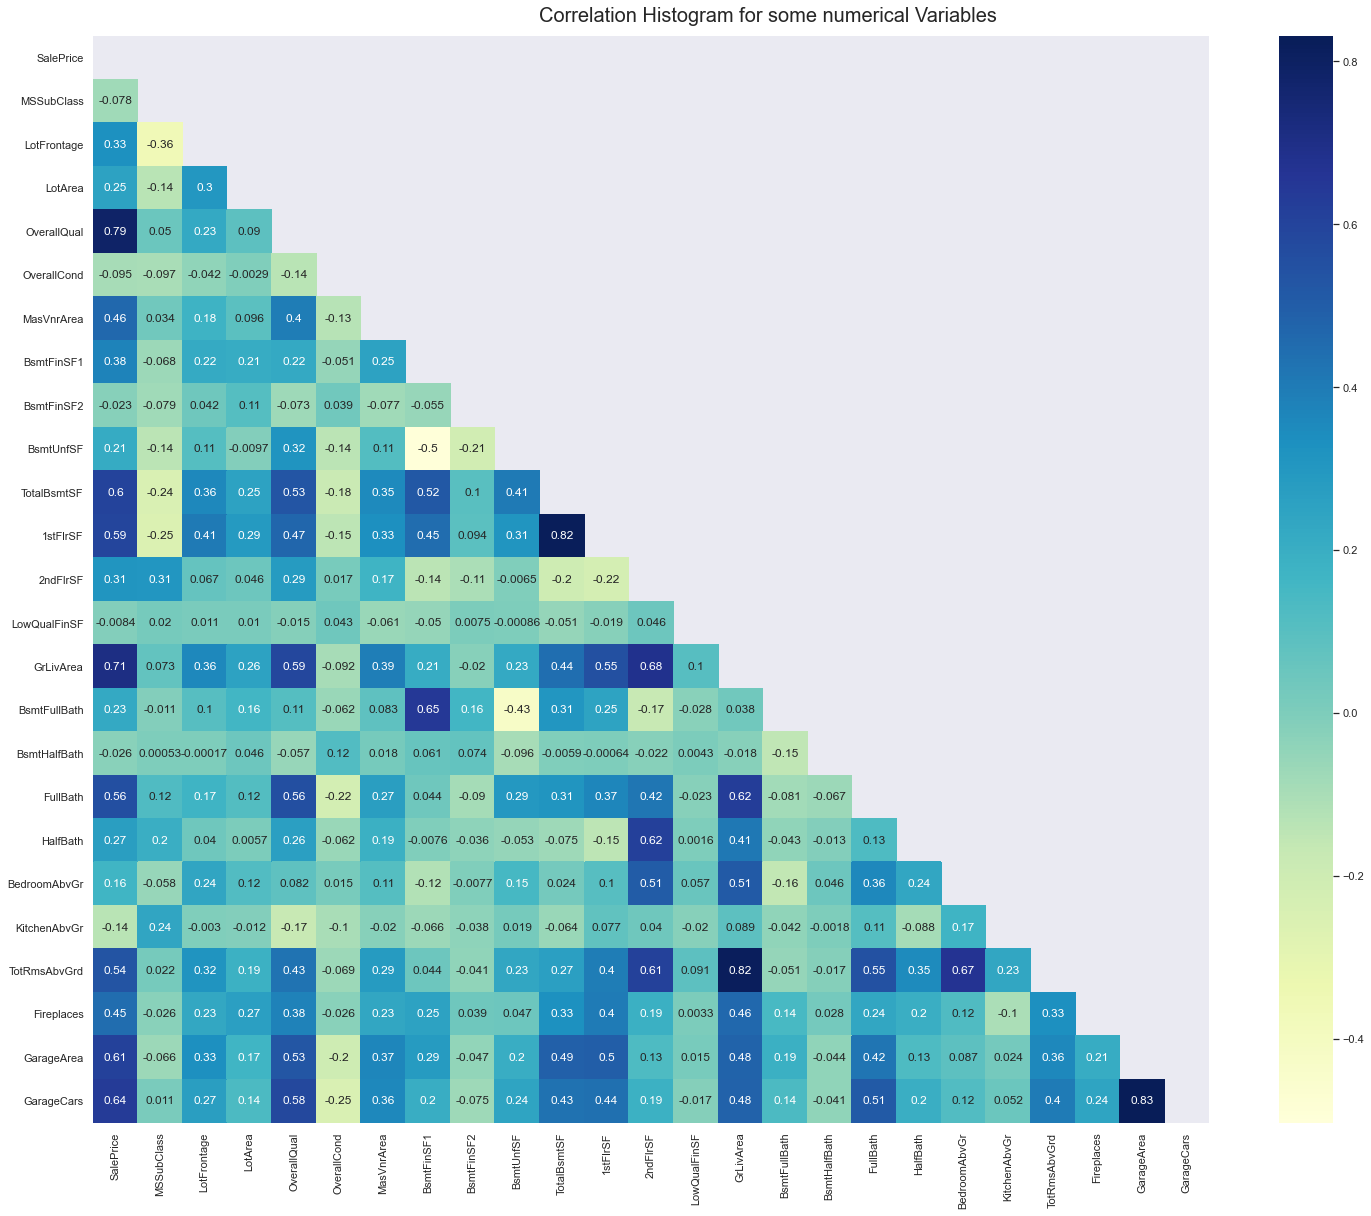

In [19]:
# visualizing the data - with the current used variables
plt.figure(figsize=(25,20))
sns.heatmap(corr_matrix , mask=mask,annot=True , cmap='YlGnBu')
plt.suptitle("Correlation Histogram for some numerical Variables", y=0.9, fontsize=20 ) # y= some height>1 
plt.savefig("./numvariablehistogram1.png",bbox_inches='tight', dpi=300)
plt.show()


In [20]:
corr_matrix['SalePrice'].sort_values()

KitchenAbvGr   -0.135574
OverallCond    -0.095278
MSSubClass     -0.077707
BsmtHalfBath   -0.025651
BsmtFinSF2     -0.023243
LowQualFinSF   -0.008364
BedroomAbvGr    0.164655
BsmtUnfSF       0.213135
BsmtFullBath    0.225988
LotArea         0.252921
HalfBath        0.270721
2ndFlrSF        0.313336
LotFrontage     0.329319
BsmtFinSF1      0.375563
Fireplaces      0.448877
MasVnrArea      0.463139
TotRmsAbvGrd    0.538309
FullBath        0.556550
1stFlrSF        0.594935
TotalBsmtSF     0.603583
GarageArea      0.608405
GarageCars      0.637095
GrLivArea       0.708172
OverallQual     0.787228
SalePrice       1.000000
Name: SalePrice, dtype: float64

In [588]:
## We can easily identify very poorly correlated parameters with SalePrice and drop them  , for eg.. MSSubClass, OverallCond, KitchenAbvGr,BsmtHalfBath,BsmtfinSF2 ,LowQualFinSF, BedroomAbvGr
drop_columns=["KitchenAbvGr","OverallCond","MSSubClass","BsmtHalfBath","BsmtFinSF2","LowQualFinSF","BedroomAbvGr"]
# drop the columns needed to be dropped
houses_cleaned=houses.drop(drop_columns,axis=1)

In [589]:
## Lets draw heatmap on remaining numerical different variables and SalePrice to get a view on correlation
corr_columns1=houses[['SalePrice','WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold']]
corr_matrix=corr_columns1.corr()

In [590]:
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

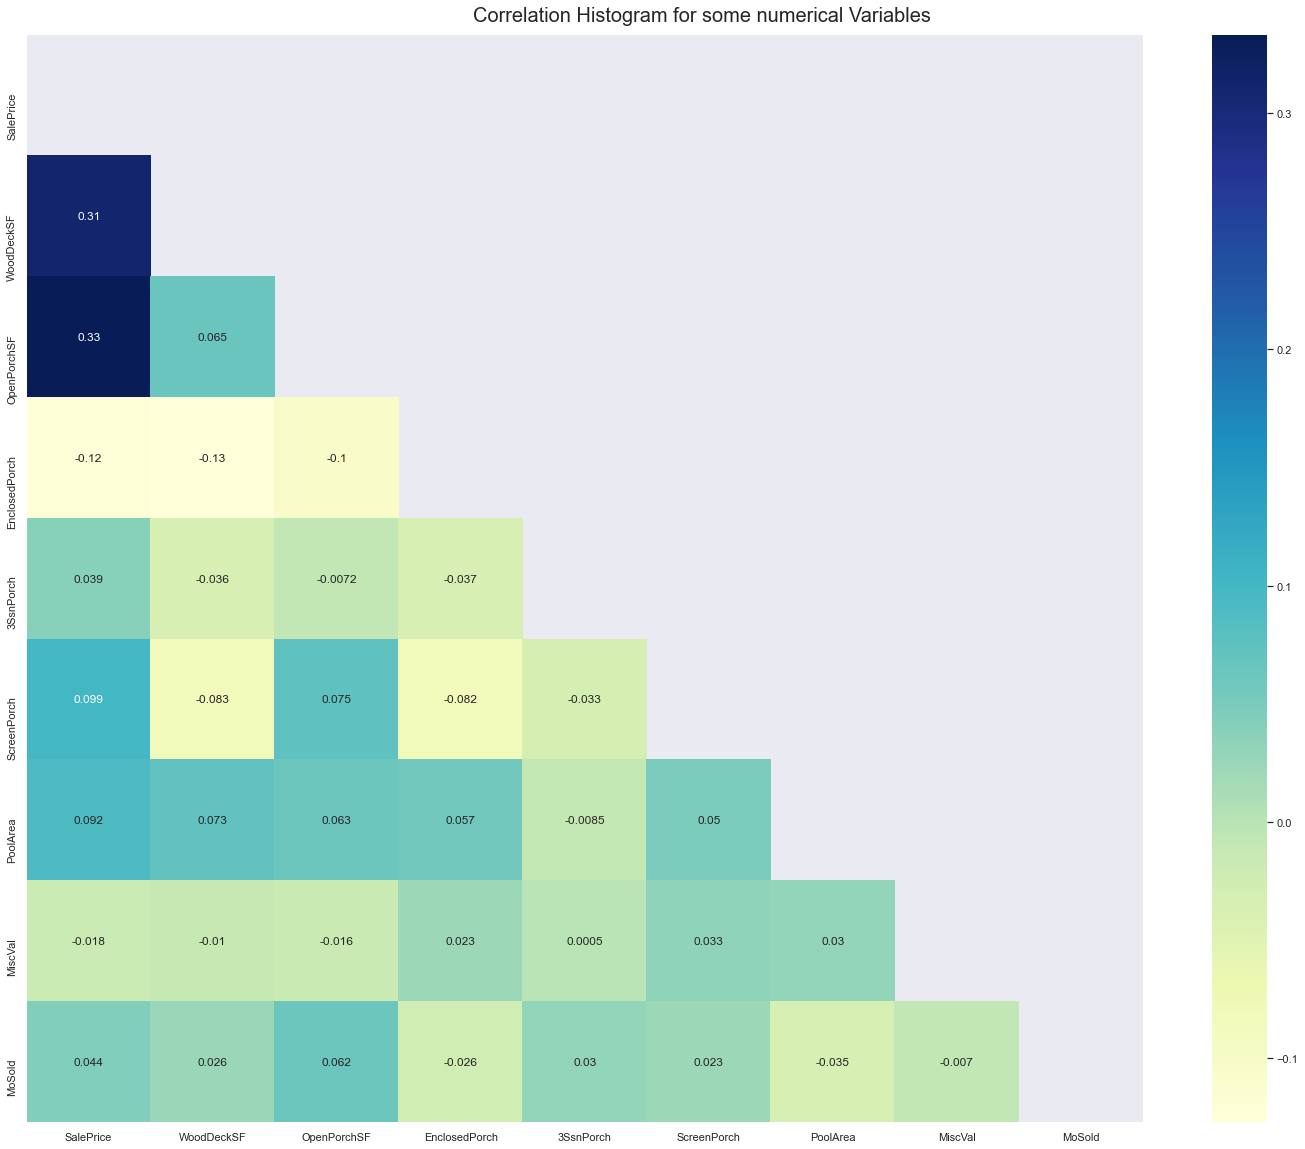

In [591]:
# visualizing the data - with the current used variables
plt.figure(figsize=(25,20))
sns.heatmap(corr_matrix , mask=mask,annot=True , cmap='YlGnBu')
plt.suptitle("Correlation Histogram for some numerical Variables", y=0.9, fontsize=20 ) # y= some height>1 
plt.savefig("./numvariablehistogram1.png",bbox_inches='tight', dpi=300)
plt.show()


In [592]:
corr_matrix['SalePrice'].sort_values()

EnclosedPorch   -0.120164
MiscVal         -0.017933
3SsnPorch        0.039226
MoSold           0.043749
PoolArea         0.091518
ScreenPorch      0.099453
WoodDeckSF       0.312631
OpenPorchSF      0.333036
SalePrice        1.000000
Name: SalePrice, dtype: float64

In [593]:
## We can easily identify very poorly correlated parameters with SalePrice and drop them  , for eg.. MSSubClass, OverallCond, KitchenAbvGr,BsmtHalfBath,BsmtfinSF2 ,LowQualFinSF, BedroomAbvGr
drop_columns=["EnclosedPorch","MiscVal","3SsnPorch","MoSold","PoolArea","ScreenPorch"]
# drop the columns needed to be dropped
houses_cleaned=houses_cleaned.drop(drop_columns,axis=1)


In [594]:
## Since we have lots of categorical variable , lets check them and remove unwanted ones or not yielding any impact to Saleprice , to avoid Encoding all of them.
categorical_columns=houses.select_dtypes(include=['object']).columns.tolist()
print (len(categorical_columns))
print (categorical_columns)

43
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [595]:
houses_cleaned['Utilities'].value_counts()



AllPub    1378
NoSeWa       1
Name: Utilities, dtype: int64

In [596]:
houses_cleaned=houses_cleaned.drop('Utilities',axis=1)

In [597]:
houses_cleaned['Street'].value_counts()
# almost all rows are values as Pave , no use keeping this column.

Pave    1374
Grvl       5
Name: Street, dtype: int64

In [598]:
houses_cleaned=houses_cleaned.drop('Street',axis=1)

In [599]:
houses_cleaned['LandSlope'].value_counts()
# almost all rows are values as Gtl , it makes sense to keep them for analysis further

Gtl    1306
Mod      61
Sev      12
Name: LandSlope, dtype: int64

In [600]:
houses_cleaned=houses_cleaned.drop('LandSlope',axis=1)

In [601]:
houses_cleaned['Condition2'].value_counts()
# almost all rows are values as Norm , lets drop this variable

Norm      1365
Feedr        5
RRNn         2
Artery       2
PosN         2
RRAn         1
PosA         1
RRAe         1
Name: Condition2, dtype: int64

In [602]:
houses_cleaned=houses_cleaned.drop('Condition2',axis=1)

In [603]:
houses_cleaned['RoofMatl'].value_counts()
# almost all rows are values as CompShg , we can drop this column

CompShg    1354
Tar&Grv      10
WdShngl       6
WdShake       5
Roll          1
Metal         1
ClyTile       1
Membran       1
Name: RoofMatl, dtype: int64

In [604]:
houses_cleaned=houses_cleaned.drop('RoofMatl',axis=1)

In [605]:
houses_cleaned['BsmtCond'].value_counts()
# almost all rows are values as TA , we can drop this column

TA             1247
Gd               63
Fa               38
No Basement      30
Po                1
Name: BsmtCond, dtype: int64

In [606]:
houses_cleaned=houses_cleaned.drop('BsmtCond',axis=1)

In [607]:
houses_cleaned['Heating'].value_counts()
# almost all rows are values as GasA , we can drop the column

GasA     1353
GasW       17
Wall        4
Grav        3
Floor       1
OthW        1
Name: Heating, dtype: int64

In [608]:
houses_cleaned=houses_cleaned.drop('Heating',axis=1)

In [609]:
houses_cleaned['CentralAir'].value_counts()
# almost all rows are values as Y , we can drop the column

Y    1310
N      69
Name: CentralAir, dtype: int64

In [610]:
houses_cleaned=houses_cleaned.drop('CentralAir',axis=1)

In [611]:
houses_cleaned['Electrical'].value_counts()
# almost all rows are values as SBrkr , we can drop the column

SBrkr    1272
FuseA      81
FuseF      22
FuseP       2
Mix         1
Name: Electrical, dtype: int64

In [612]:
houses_cleaned=houses_cleaned.drop('Electrical',axis=1)

In [613]:
houses_cleaned['Functional'].value_counts()
# almost all rows are values as Typ , lets drop this columns

Typ     1287
Min2      32
Min1      31
Mod       13
Maj1      11
Maj2       4
Sev        1
Name: Functional, dtype: int64

In [614]:
houses_cleaned=houses_cleaned.drop('Functional',axis=1)

In [615]:
houses_cleaned['GarageQual'].value_counts()
# almost all rows are values as TA , lets drop this columns

TA    1311
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64

In [616]:
houses_cleaned=houses_cleaned.drop('GarageQual',axis=1)

In [617]:
houses_cleaned['GarageCond'].value_counts()
# almost all rows are values as TA , lets drop this columns

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [618]:
houses_cleaned=houses_cleaned.drop('GarageCond',axis=1)

In [619]:
houses_cleaned['PavedDrive'].value_counts()
# almost all rows are values as Y , lets drop this columns

Y    1293
N      58
P      28
Name: PavedDrive, dtype: int64

In [620]:
houses_cleaned=houses_cleaned.drop('PavedDrive',axis=1)

In [621]:
houses_cleaned['PoolQC'].value_counts()
# almost all rows are values as No Pool , lets drop this columns

No Pool    1372
Gd            3
Fa            2
Ex            2
Name: PoolQC, dtype: int64

In [622]:
houses_cleaned=houses_cleaned.drop('PoolQC',axis=1)

In [623]:
houses_cleaned['MiscFeature'].value_counts()
# almost all rows are values as None , lets drop this columns

None    1328
Shed      47
Gar2       2
Othr       1
TenC       1
Name: MiscFeature, dtype: int64

In [624]:
houses_cleaned=houses_cleaned.drop('MiscFeature',axis=1)

In [625]:
# Lets also drop Id column , it has no use
houses_cleaned=houses_cleaned.drop('Id',axis=1)
houses_temp=houses_cleaned

In [628]:
## Since we have lots of categorical variable , lets check them now before Encoding all of them.
houses_cleaned=houses_temp
categorical_columns=houses_cleaned.select_dtypes(include=['object']).columns.tolist()
print (len(categorical_columns))
print (categorical_columns)

28
['MSZoning', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'Fence', 'SaleType', 'SaleCondition']


In [629]:
## Since we have lots of numerical variable , lets check them now before Encoding all of them.
non_categorical_columns=houses_cleaned.select_dtypes(exclude=['object']).columns.tolist()
print (len(non_categorical_columns))
print (non_categorical_columns)

24
['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'YrSold', 'SalePrice']


### Checking Outliers

In [630]:
def detect_outliers_iqr(data):
    #data = data.sort_values
    outliers = []
    q1 = np.quantile(data, 0.01)
    q3 = np.quantile(data, 0.99)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code

for i in non_categorical_columns:
    sample_outliers = detect_outliers_iqr(houses_cleaned[i])
    print("Outliers from IQR method for less than 1% and high than 99% for ",i, " are" ,sample_outliers)

Outliers from IQR method for less than 1% and high than 99% for  LotFrontage  are [313.0, 313.0]
Outliers from IQR method for less than 1% and high than 99% for  LotArea  are [159000, 215245, 164660, 115149]
Outliers from IQR method for less than 1% and high than 99% for  OverallQual  are []
Outliers from IQR method for less than 1% and high than 99% for  YearBuilt  are []
Outliers from IQR method for less than 1% and high than 99% for  YearRemodAdd  are []
Outliers from IQR method for less than 1% and high than 99% for  MasVnrArea  are []
Outliers from IQR method for less than 1% and high than 99% for  BsmtFinSF1  are [5644]
Outliers from IQR method for less than 1% and high than 99% for  BsmtUnfSF  are []
Outliers from IQR method for less than 1% and high than 99% for  TotalBsmtSF  are [6110]
Outliers from IQR method for less than 1% and high than 99% for  1stFlrSF  are []
Outliers from IQR method for less than 1% and high than 99% for  2ndFlrSF  are []
Outliers from IQR method for l

In [631]:
houses_outlierremoved=houses_cleaned[houses_cleaned['LotArea'] < 115149]
houses_outlierremoved=houses_outlierremoved[houses_outlierremoved['LotFrontage'] < 313]
houses_outlierremoved=houses_outlierremoved[houses_outlierremoved['BsmtFinSF1'] < 5644]
houses_outlierremoved=houses_outlierremoved[houses_outlierremoved['TotalBsmtSF'] < 6110]

In [632]:
houses_outlierremoved.head()

,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,...,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Fence,YrSold,SaleType,SaleCondition,SalePrice
0,RL,65.0,8450,No Alley,Reg,Lvl,Inside,CollgCr,Norm,1Fam,...,RFn,2,548,0,61,No Fence,2008,WD,Normal,208500
1,RL,80.0,9600,No Alley,Reg,Lvl,FR2,Veenker,Feedr,1Fam,...,RFn,2,460,298,0,No Fence,2007,WD,Normal,181500
2,RL,68.0,11250,No Alley,IR1,Lvl,Inside,CollgCr,Norm,1Fam,...,RFn,2,608,0,42,No Fence,2008,WD,Normal,223500
3,RL,60.0,9550,No Alley,IR1,Lvl,Corner,Crawfor,Norm,1Fam,...,Unf,3,642,0,35,No Fence,2006,WD,Abnorml,140000
4,RL,84.0,14260,No Alley,IR1,Lvl,FR2,NoRidge,Norm,1Fam,...,RFn,3,836,192,84,No Fence,2008,WD,Normal,250000


### 4. Data Preparation
Encoding the categorical variables.

In [633]:
houses_cleaned=houses_outlierremoved
houses_updated=houses_cleaned
for i in categorical_columns:
    encoding=pd.get_dummies(houses_cleaned[i],prefix=i,drop_first=True)
    # concatentate the 2 data sets now
    houses_updated=pd.concat([houses_updated,encoding],axis=1)
    houses_updated=houses_updated.drop(i,axis=1)

### 1st level RFE based selection , due to too many parameters especailly categorical

In [634]:
# We can do data transformation encoding for all cataegorical variables and then select the features or do RFE first and do encoding only on selected features.
# Lets do RFE first
    ## train-test 70-30 split
houses_train, houses_test = train_test_split(houses_updated, 
                                     train_size = 0.7, 
                                     test_size = 0.3, 
                                     random_state = 100)

# rescale the features
scaler = MinMaxScaler()

# apply scaler() to all the numeric columns 
numeric_vars = houses_updated.select_dtypes(include=np.number).columns.tolist()
houses_train[numeric_vars] = scaler.fit_transform(houses_train[numeric_vars])
houses_train.head()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
457,0.320261,0.747571,0.250,0.573643,0.733333,0.0000,0.532443,0.106164,0.425452,0.439068,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
178,0.274510,0.232116,0.875,0.992248,0.983333,0.4675,0.908397,0.133562,0.691204,0.643728,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1301,0.320261,0.089259,0.500,0.480620,0.000000,0.0000,0.260973,0.095890,0.240487,0.112903,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1310,0.516340,0.233224,0.625,0.612403,0.866667,0.0000,0.670802,0.212329,0.593263,0.524731,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
713,0.254902,0.123422,0.250,0.697674,0.333333,0.1000,0.376431,0.073202,0.299439,0.187097,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [635]:
# divide into X_train, y_train, X_test, y_test
y_train = houses_train.pop('SalePrice')
X_train = houses_train

y_test = houses_test.pop('SalePrice')
X_test = houses_test

In [636]:
# now we have 186 feature variables , To build the model using RFE, we need to tell RFE how many features we want in the final model. It then runs a feature elimination algorithm.

# Note that the number of features to be used in the model is a hyperparameter
# first model with an arbitrary choice of n_features
# running RFE with number of features=40

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=40)             
rfe = rfe.fit(X_train, y_train)

In [637]:
# tuples of (feature name, whether selected, ranking)
# note that the 'rank' is > 1 for non-selected features
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 102),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', True, 1),
 ('MasVnrArea', True, 1),
 ('BsmtFinSF1', True, 1),
 ('BsmtUnfSF', False, 89),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', False, 92),
 ('2ndFlrSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 118),
 ('FullBath', False, 116),
 ('HalfBath', False, 132),
 ('TotRmsAbvGrd', False, 4),
 ('Fireplaces', False, 107),
 ('GarageYrBlt', False, 140),
 ('GarageCars', False, 27),
 ('GarageArea', True, 1),
 ('WoodDeckSF', True, 1),
 ('OpenPorchSF', False, 61),
 ('YrSold', False, 101),
 ('MSZoning_FV', False, 81),
 ('MSZoning_RH', False, 129),
 ('MSZoning_RL', False, 57),
 ('MSZoning_RM', False, 58),
 ('Alley_No Alley', False, 120),
 ('Alley_Pave', False, 119),
 ('LotShape_IR2', False, 75),
 ('LotShape_IR3', False, 3),
 ('LotShape_Reg', False, 142),
 ('LandContour_HLS', False, 69),
 ('LandContour_Low', True, 1),
 ('LandContour_Lvl', False, 146),
 ('LotConfig

In [638]:
# predict prices of X_train
y_train_pred = rfe.predict(X_train)

# evaluate the model on train and test set
r2 = r2_score(y_train, y_train_pred)
print(r2)

0.9013343079254154


In [639]:
## Lets drop columns with all false and also in particular if few of the categorical variables are flse , lets drop whole variable itself.
drop_columns=["LotFrontage","BsmtUnfSF","1stFlrSF","BsmtFullBath","FullBath","HalfBath","Fireplaces","TotRmsAbvGrd","GarageCars","GarageYrBlt","OpenPorchSF","YrSold","MSZoning","Alley","LotConfig","LotShape","Condition1","RoofStyle","Exterior1st","Exterior2nd","MasVnrType","Foundation","FireplaceQu","GarageFinish","GarageType","Fence"]
# drop the columns needed to be dropped
houses_cleaned=houses_cleaned.drop(drop_columns,axis=1)
houses_temp=houses_cleaned

In [640]:
## Since we have lots of categorical variable , lets check them now before Encoding all of them.
categorical_columns=houses_cleaned.select_dtypes(include=['object']).columns.tolist()
print (len(categorical_columns))
print (categorical_columns)

14
['LandContour', 'Neighborhood', 'BldgType', 'HouseStyle', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'SaleType', 'SaleCondition']


In [641]:
houses_updated=houses_cleaned
for i in categorical_columns:
    encoding=pd.get_dummies(houses_cleaned[i],prefix=i,drop_first=True)
    # concatentate the 2 data sets now
    houses_updated=pd.concat([houses_updated,encoding],axis=1)
    houses_updated=houses_updated.drop(i,axis=1)

In [642]:
# We can do data transformation encoding for all cataegorical variables and then select the features or do RFE first and do encoding only on selected features.
# Lets do RFE first
    ## train-test 70-30 split
houses_train, houses_test = train_test_split(houses_updated, 
                                     train_size = 0.7, 
                                     test_size = 0.3, 
                                     random_state = 100)

# rescale the features
scaler = MinMaxScaler()

# apply scaler() to all the numeric columns 
numeric_vars = houses_updated.select_dtypes(include=np.number).columns.tolist()
houses_train[numeric_vars] = scaler.fit_transform(houses_train[numeric_vars])

In [643]:
# divide into X_train, y_train, X_test, y_test
y_train = houses_train.pop('SalePrice')
X_train = houses_train


In [644]:
# we will start of with stats model library
import statsmodels.api as sm

In [645]:
# add constant
X_train_sm= sm.add_constant(X_train)
X_train_sm.head()

,const,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,2ndFlrSF,GrLivArea,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
457,1.0,0.747571,0.250,0.573643,0.733333,0.0000,0.532443,0.425452,0.000000,0.303368,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
178,1.0,0.232116,0.875,0.992248,0.983333,0.4675,0.908397,0.691204,0.000000,0.444775,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1301,1.0,0.089259,0.500,0.480620,0.000000,0.0000,0.260973,0.240487,0.358838,0.261516,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1310,1.0,0.233224,0.625,0.612403,0.866667,0.0000,0.670802,0.593263,0.000000,0.362556,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
713,1.0,0.123422,0.250,0.697674,0.333333,0.1000,0.376431,0.299439,0.000000,0.129272,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


### Model creation using SM OLS and removing parameters using P value and VIF !

In [646]:
# create 2nd model 
lr = sm.OLS(y_train , X_train_sm)

# fit the model
model = lr.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     99.56
Date:                Tue, 08 Mar 2022   Prob (F-statistic):               0.00
Time:                        17:39:12   Log-Likelihood:                 1932.7
No. Observations:                 961   AIC:                            -3675.
Df Residuals:                     866   BIC:                            -3213.
Df Model:                          94                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.0317      0.045      0.698      0.485      -0.057       0.121
LotArea                      0.1022      0.020      5.141      0.000       0.063       0.141
OverallQual                  0.1132      0.013      8.432      0.000       0.087       0.139
YearBuilt                    0.0505      0.014      3.588      0.000       0.023       0.078
YearRemodAdd                 0.0169      0.006      3.059      0.002       0.006       0.028
MasVnrArea                   0.0090      0.012      0.728      0.467      -0.015       0.033
BsmtFinSF1                   0.0570      0.010      5.747      0.000       0.038       0.077
TotalBsmtSF                  0.1448      0.027      5.379      0.000       0.092       0.198
2ndFlrSF                     0.1269      0.023      5.552      0.000       0.082       0.172
GrLivArea                    0.2283      0.032      7.064      0.000       0.165       0.292
GarageArea                   0.0331      0.011      2.928      0.004       0.011       0.055
WoodDeckSF                   0.0137      0.007      1.835      0.067      -0.001       0.028
LandContour_HLS              0.0132      0.009      1.412      0.158      -0.005       0.032
LandContour_Low             -0.0249      0.011     -2.324      0.020      -0.046      -0.004
LandContour_Lvl             -0.0017      0.006     -0.273      0.785      -0.014       0.011
Neighborhood_Blueste         0.0047      0.036      0.130      0.897      -0.066       0.076
Neighborhood_BrDale          0.0053      0.017      0.322      0.747      -0.027       0.038
Neighborhood_BrkSide         0.0109      0.015      0.744      0.457      -0.018       0.040
Neighborhood_ClearCr        -0.0174      0.015     -1.140      0.255      -0.047       0.013
Neighborhood_CollgCr        -0.0102      0.012     -0.862      0.389      -0.033       0.013
Neighborhood_Crawfor         0.0289      0.014      2.077      0.038       0.002       0.056
Neighborhood_Edwards        -0.0249      0.013     -1.907      0.057      -0.051       0.001
Neighborhood_Gilbert        -0.0115      0.013     -0.901      0.368      -0.037       0.014
Neighborhood_IDOTRR         -0.0057      0.016     -0.365      0.715      -0.037       0.025
Neighborhood_MeadowV        -0.0014      0.017     -0.080      0.937      -0.035       0.032
Neighborhood_Mitchel        -0.0267      0.014     -1.976      0.049      -0.053      -0.000
Neighborhood_NAmes          -0.0177      0.013     -1.395      0.163      -0.043       0.007
Neighborhood_NPkVill         0.0236      0.023      1.014      0.311      -0.022       0.069
Neighborhood_NWAmes         -0.0166      0.013     -1.286      0.199      -0.042       0.009
Neighborhood_NoRidge         0.0399      0.014      2.913      0.004       0.013       0.067
Neighborhood_N

#### Lets check the multi colinearity among variables before we decide drop any variable.

### lets compute VIF
#### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

#### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [647]:
# import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [648]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
66,BsmtFinType1_No Basement,inf
57,BsmtQual_No Basement,inf
54,ExterCond_TA,333.60
74,BsmtFinType2_Unf,95.22
2,YearBuilt,88.89
8,GrLivArea,76.90
6,TotalBsmtSF,75.03
87,SaleType_New,54.61
94,SaleCondition_Partial,52.26
1,OverallQual,43.15


### There is perfect correlation btw some components hence Infiinite VIF ,  lets drop variables with high P value first 

In [649]:
# Some of the categorical vairables have high P value , lets drop the variable if some of them have high p value 
# Lets drop columns with all false and also in particular if few of the categorical variables are flse , lets drop whole variable itself.
houses_cleaned=houses_temp
drop_columns=["BsmtFinType2","BsmtFinType1","MasVnrArea","LandContour","SaleType","ExterCond","BsmtExposure"]
# drop the columns needed to be dropped
houses_cleaned=houses_cleaned.drop(drop_columns,axis=1)
## Since we have lots of categorical variable , lets check them now before Encoding all of them.
categorical_columns=houses_cleaned.select_dtypes(include=['object']).columns.tolist()
houses_temp=houses_cleaned
houses_updated=houses_cleaned
for i in categorical_columns:
    encoding=pd.get_dummies(houses_cleaned[i],prefix=i,drop_first=True)
    # concatentate the 2 data sets now
    houses_updated=pd.concat([houses_updated,encoding],axis=1)
    houses_updated=houses_updated.drop(i,axis=1)

# We can do data transformation encoding for all cataegorical variables and then select the features or do RFE first and do encoding only on selected features.
# Lets do RFE first
    ## train-test 70-30 split
houses_train, houses_test = train_test_split(houses_updated, 
                                     train_size = 0.7, 
                                     test_size = 0.3, 
                                     random_state = 100)

# rescale the features
scaler = MinMaxScaler()

# apply scaler() to all the numeric columns 
numeric_vars = houses_updated.select_dtypes(include=np.number).columns.tolist()
houses_train[numeric_vars] = scaler.fit_transform(houses_train[numeric_vars])

# divide into X_train, y_train, X_test, y_test
y_train = houses_train.pop('SalePrice')
X_train = houses_train


# add constant
X_train_sm= sm.add_constant(X_train)
X_train_sm.head()

# create 2nd model 
lr = sm.OLS(y_train , X_train_sm)

# fit the model
model = lr.fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     135.5
Date:                Tue, 08 Mar 2022   Prob (F-statistic):               0.00
Time:                        17:39:15   Log-Likelihood:                 1884.6
No. Observations:                 961   AIC:                            -3639.
Df Residuals:                     896   BIC:                            -3323.
Df Model:                          64                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0017      0.023     -0.075      0.940      -0.047       0.044
LotArea                   0.1047      0.020      5.357      0.000       0.066       0.143
OverallQual               0.1275      0.013      9.486      0.000       0.101       0.154
YearBuilt                 0.0553      0.014      3.911      0.000       0.028       0.083
YearRemodAdd              0.0172      0.006      3.089      0.002       0.006       0.028
BsmtFinSF1                0.0699      0.007     10.198      0.000       0.056       0.083
TotalBsmtSF               0.1442      0.025      5.666      0.000       0.094       0.194
2ndFlrSF                  0.1079      0.023      4.767      0.000       0.063       0.152
GrLivArea                 0.2336      0.032      7.412      0.000       0.172       0.295
GarageArea                0.0333      0.011      2.961      0.003       0.011       0.055
WoodDeckSF                0.0198      0.008      2.640      0.008       0.005       0.035
Neighborhood_Blueste     -0.0033      0.037     -0.089      0.929      -0.076       0.070
Neighborhood_BrDale       0.0012      0.017      0.074      0.941      -0.031       0.034
Neighborhood_BrkSide      0.0092      0.015      0.621      0.535      -0.020       0.038
Neighborhood_ClearCr     -0.0228      0.015     -1.508      0.132      -0.053       0.007
Neighborhood_CollgCr     -0.0149      0.012     -1.238      0.216      -0.039       0.009
Neighborhood_Crawfor      0.0287      0.014      2.069      0.039       0.001       0.056
Neighborhood_Edwards     -0.0268      0.013     -2.014      0.044      -0.053      -0.001
Neighborhood_Gilbert     -0.0175      0.013     -1.355      0.176      -0.043       0.008
Neighborhood_IDOTRR      -0.0056      0.016     -0.356      0.722      -0.037       0.025
Neighborhood_MeadowV     -0.0029      0.018     -0.164      0.870      -0.037       0.032
Neighborhood_Mitchel     -0.0311      0.014     -2.273      0.023      -0.058      -0.004
Neighborhood_NAmes       -0.0196      0.013     -1.531      0.126      -0.045       0.006
Neighborhood_NPkVill      0.0097      0.024      0.411      0.682      -0.037       0.056
Neighborhood_NWAmes      -0.0243      0.013     -1.873      0.061      -0.050       0.001
Neighborhood_NoRidge      0.0318      0.014      2.312      0.021       0.005       0.059
Neighborhood_NridgHt      0.0036      0.012      0.292      0.770      -0.021       0.028
Neighborhood_OldTown     -0.0180      0.014     -1.269      0.205      -0.046       0.010
Neighborhood_SWISU       -0.0241      0.017     -1.429      0.153      -0.057       0.009
Neighborhood_Sawyer      -0.0209      0.013     -1.556      0.120      -0.047       0.005
Neighborhood_SawyerW     -0.0195      0.013     -1.503      0.133      -0.045       0.006
Neighborhood_Somerst   

In [650]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,YearBuilt,70.12
7,GrLivArea,68.55
5,TotalBsmtSF,61.74
1,OverallQual,38.85
47,ExterQual_TA,31.46
6,2ndFlrSF,29.24
58,KitchenQual_TA,16.81
39,HouseStyle_1Story,16.01
62,SaleCondition_Normal,15.75
51,BsmtQual_TA,15.03


In [651]:
### P value of the the parameter is under control for numeric variables, for catgorical , it is mixed , 
#but still VIF is high for few parameters  ,  lets drop variables with high VIF 

In [652]:
# Some of the categorical vairables have high P value , lets drop the variable if some of them have high p value 
# Lets drop columns with all false and also in particular if few of the categorical variables are flse , lets drop whole variable itself.
houses_cleaned=houses_temp
drop_columns=["BsmtQual","TotalBsmtSF","2ndFlrSF","ExterQual","YearBuilt","LotArea","SaleCondition","HouseStyle"]
# drop the columns needed to be dropped
houses_cleaned=houses_cleaned.drop(drop_columns,axis=1)
## Since we have lots of categorical variable , lets check them now before Encoding all of them.
categorical_columns=houses_cleaned.select_dtypes(include=['object']).columns.tolist()
houses_updated=houses_cleaned
for i in categorical_columns:
    encoding=pd.get_dummies(houses_cleaned[i],prefix=i,drop_first=True)
    # concatentate the 2 data sets now
    houses_updated=pd.concat([houses_updated,encoding],axis=1)
    houses_updated=houses_updated.drop(i,axis=1)

# We can do data transformation encoding for all cataegorical variables and then select the features or do RFE first and do encoding only on selected features.
# Lets do RFE first
    ## train-test 70-30 split
houses_train, houses_test = train_test_split(houses_updated, 
                                     train_size = 0.7, 
                                     test_size = 0.3, 
                                     random_state = 100)

# rescale the features
scaler = MinMaxScaler()

# apply scaler() to all the numeric columns 
numeric_vars = houses_updated.select_dtypes(include=np.number).columns.tolist()
houses_train[numeric_vars] = scaler.fit_transform(houses_train[numeric_vars])

# divide into X_train, y_train, X_test, y_test
y_train = houses_train.pop('SalePrice')
X_train = houses_train

# add constant
X_train_sm= sm.add_constant(X_train)
X_train_sm.head()


# create 2nd model 
lr = sm.OLS(y_train , X_train_sm)

# fit the model
model = lr.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     163.5
Date:                Tue, 08 Mar 2022   Prob (F-statistic):               0.00
Time:                        17:39:16   Log-Likelihood:                 1763.0
No. Observations:                 961   AIC:                            -3442.
Df Residuals:                     919   BIC:                            -3237.
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0751      0.018      4.266      0.000       0.041       0.110
OverallQual              0.1620      0.014     11.769      0.000       0.135       0.189
YearRemodAdd             0.0207      0.006      3.522      0.000       0.009       0.032
BsmtFinSF1               0.0944      0.007     13.467      0.000       0.081       0.108
GrLivArea                0.3139      0.015     20.753      0.000       0.284       0.344
GarageArea               0.0721      0.012      6.058      0.000       0.049       0.095
WoodDeckSF               0.0247      0.008      2.995      0.003       0.009       0.041
Neighborhood_Blueste    -0.0405      0.041     -0.978      0.328      -0.122       0.041
Neighborhood_BrDale     -0.0235      0.018     -1.328      0.184      -0.058       0.011
Neighborhood_BrkSide    -0.0303      0.015     -1.996      0.046      -0.060      -0.001
Neighborhood_ClearCr    -0.0180      0.016     -1.149      0.251      -0.049       0.013
Neighborhood_CollgCr    -0.0288      0.013     -2.190      0.029      -0.055      -0.003
Neighborhood_Crawfor    -0.0027      0.014     -0.186      0.853      -0.031       0.026
Neighborhood_Edwards    -0.0477      0.014     -3.347      0.001      -0.076      -0.020
Neighborhood_Gilbert    -0.0295      0.014     -2.109      0.035      -0.057      -0.002
Neighborhood_IDOTRR     -0.0455      0.016     -2.805      0.005      -0.077      -0.014
Neighborhood_MeadowV    -0.0179      0.019     -0.935      0.350      -0.055       0.020
Neighborhood_Mitchel    -0.0423      0.015     -2.874      0.004      -0.071      -0.013
Neighborhood_NAmes      -0.0389      0.014     -2.845      0.005      -0.066      -0.012
Neighborhood_NPkVill    -0.0121      0.026     -0.461      0.645      -0.063       0.039
Neighborhood_NWAmes     -0.0425      0.014     -3.022      0.003      -0.070      -0.015
Neighborhood_NoRidge     0.0225      0.015      1.500      0.134      -0.007       0.052
Neighborhood_NridgHt     0.0151      0.014      1.115      0.265      -0.011       0.042
Neighborhood_OldTown    -0.0639      0.014     -4.569      0.000      -0.091      -0.036
Neighborhood_SWISU      -0.0688      0.017     -3.948      0.000      -0.103      -0.035
Neighborhood_Sawyer     -0.0387      0.014     -2.685      0.007      -0.067      -0.010
Neighborhood_SawyerW    -0.0389      0.014     -2.748      0.006      -0.067      -0.011
Neighborhood_Somerst    -0.0053      0.013     -0.398      0.690      -0.031       0.021
Neighborhood_StoneBr     0.0499      0.016      3.155      0.002       0.019       0.081
Neighborhood_Timber     -0.0178      0.015     -1.164      0.245      -0.048       0.012
Neighborhood_Veenker    -0.0083      0.019     -0.445      0.656      -0.045       0.028
BldgType_2fmCon         -0.0224      0.011     -1.974    

In [653]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,OverallQual,28.96
3,GrLivArea,12.54
40,KitchenQual_TA,10.88
1,YearRemodAdd,9.31
4,GarageArea,8.60
39,KitchenQual_Gd,7.21
17,Neighborhood_NAmes,7.20
10,Neighborhood_CollgCr,5.53
21,Neighborhood_NridgHt,4.24
22,Neighborhood_OldTown,4.08


### Finally this seems to be decent model with good r2 squared , all good p values and some higher VIF due to categorical variables influencing each other.

In [654]:
y_train_pred = model.predict(X_train_sm)

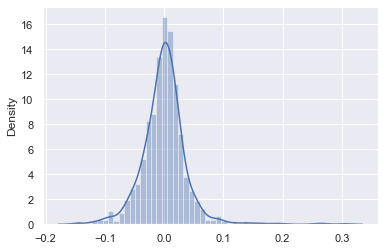

In [655]:
residual= y_train - y_train_pred
sns.distplot(residual)
plt.savefig("./residualdisplot.png",bbox_inches='tight', dpi=300)
plt.show()

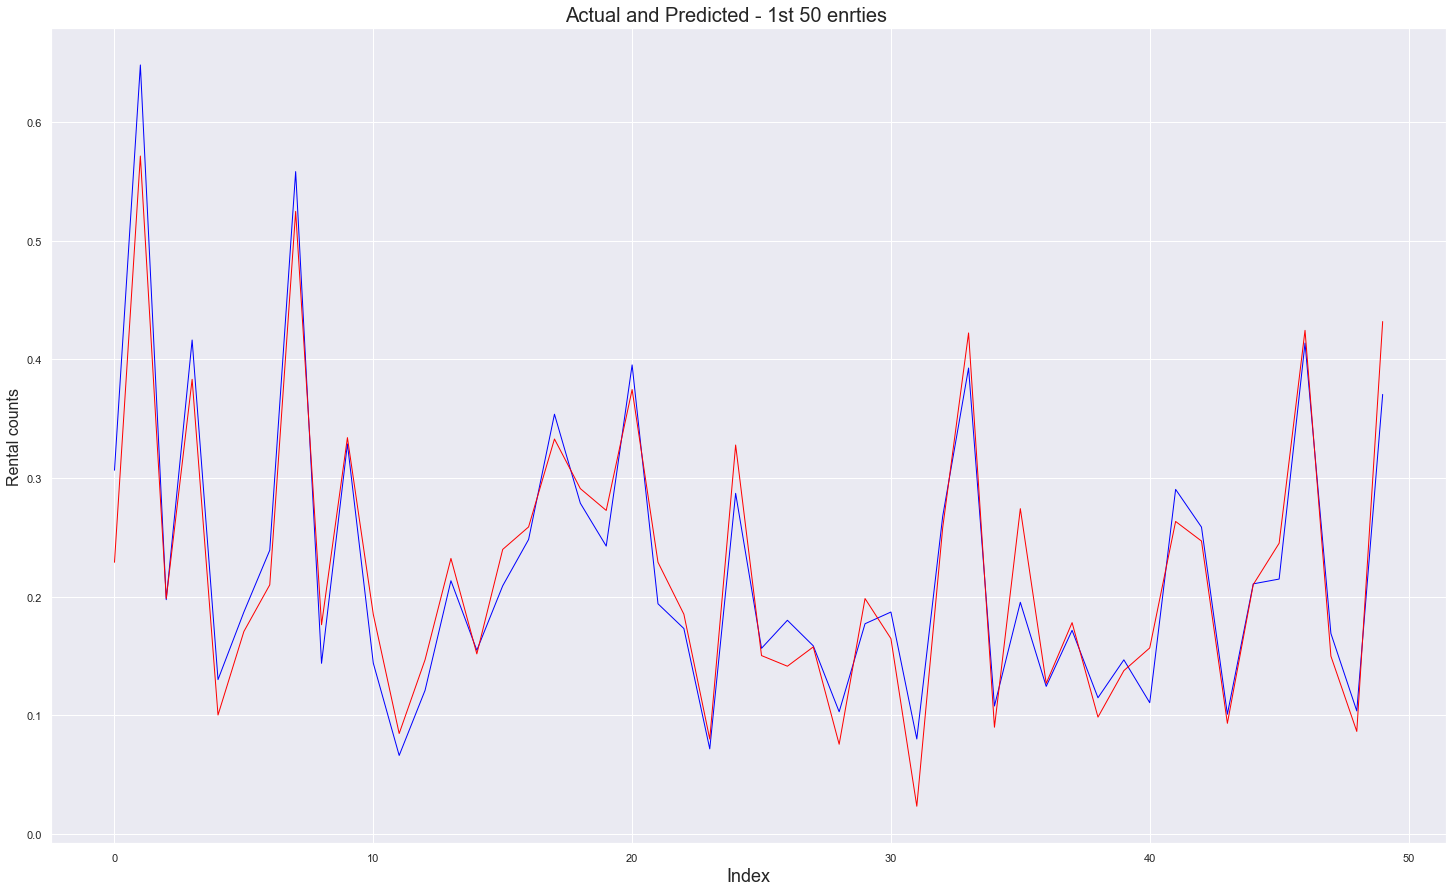

In [656]:


#Actual vs Predicted
c = [i for i in range(0,50,1)]
fig = plt.figure(figsize=(25,15))
plt.plot(c,y_train.iloc[:50], color="blue", linewidth=1, linestyle="-")
plt.plot(c,y_train_pred.iloc[:50], color="red",  linewidth=1, linestyle="-")
fig.suptitle('Actual and Predicted - 1st 50 enrties',y=0.9, fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Rental counts', fontsize=16)                               # Y-label
plt.savefig("./actualpredicted1.png",bbox_inches='tight', dpi=300)
plt.show()

## Lets check the R squared on the test set

In [657]:
# we need to prepare test data set also same way as training data set
# we only transform the test data set and not FIT finding xmax and xmin of test data set.
numeric_vars = houses_test.select_dtypes(include=np.number).columns.tolist()
X_test=houses_test
X_test[numeric_vars]=scaler.transform(X_test[numeric_vars])

In [658]:
Y_test = X_test.pop('SalePrice')

In [659]:

X_test_sm = sm.add_constant(X_test)

In [660]:

# predict y test pred
y_test_pred = model.predict(X_test_sm)
test_residual=y_test - y_test_pred

In [661]:
r2score = r2_score(y_true=Y_test , y_pred = y_test_pred)
r2score

0.810552791997898

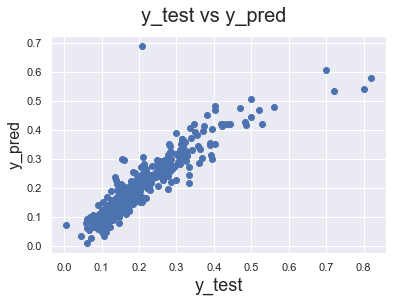

In [662]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(Y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.savefig("./errordist1.png",bbox_inches='tight', dpi=300)

In [663]:
y_pred_train = model.predict(X_train_sm)
y_pred_test = model.predict(X_test_sm)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(Y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(Y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(Y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.8794075126830455
0.810552791997898
1.4348451188416982
0.869674587816041
0.001493075045620914
0.0021108606500389346


### Before we apply regularization , we can do one more round of grid search CV and reduce parameters

### Cross-Validation in sklearn

Let's now experiment with k-fold CV.

In [664]:
# k-fold CV (using all the 13 variables)
lm = LinearRegression()
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=5)
scores      

array([0.87595081, 0.87058558, 0.88813526, 0.87454787, 0.79713105])

In [665]:
# can tune other metrics, such as MSE
scores = cross_val_score(lm, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
scores

array([-0.00190589, -0.00211406, -0.0010683 , -0.00139654, -0.00190101])

### 4.2 Hyperparameter Tuning Using Grid Search Cross-Validation

A common use of cross-validation is for tuning hyperparameters of a model. The most common technique is what is called **grid search** cross-validation.


<img src="Overview-of-Work-Process-of-Grid-Search-with-Cross-Validation.png"/>

In [666]:
# number of features in X_train
len(X_train.columns)

41

In [667]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 41))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)                  


Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22, 23,
                                                   24, 25, 26, 27, 28, 29, 30, ...]}],
             return_train_score=True, scoring='r2', verbose=1)

In [668]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.096188,0.023911,0.003872,0.000709,1,{'n_features_to_select': 1},0.483291,0.529791,0.614984,0.557099,...,0.561112,0.051903,40,0.558249,0.547188,0.646776,0.658296,0.643809,0.610864,0.047849
1,0.076388,0.011646,0.003737,0.001610,2,{'n_features_to_select': 2},0.769013,0.745875,0.776084,0.676933,...,0.738389,0.035770,39,0.740297,0.746734,0.734322,0.761684,0.750503,0.746708,0.009308
2,0.085617,0.012461,0.004004,0.001700,3,{'n_features_to_select': 3},0.777911,0.783671,0.795098,0.709431,...,0.770040,0.030811,38,0.773508,0.805097,0.766124,0.789428,0.803842,0.787600,0.015704
3,0.090830,0.024985,0.003335,0.000218,4,{'n_features_to_select': 4},0.825406,0.802001,0.845302,0.767258,...,0.813402,0.026859,36,0.817641,0.823802,0.809264,0.830970,0.817610,0.819857,0.007228
4,0.077343,0.012490,0.003319,0.000318,5,{'n_features_to_select': 5},0.830028,0.788401,0.848633,0.764920,...,0.812500,0.030926,37,0.822219,0.830795,0.814195,0.831149,0.822308,0.824133,0.006315
5,0.065907,0.006712,0.004270,0.001317,6,{'n_features_to_select': 6},0.830428,0.788755,0.848563,0.774909,...,0.814715,0.027978,35,0.822367,0.836041,0.814494,0.834744,0.822315,0.825992,0.008203
6,0.058166,0.028923,0.002380,0.000618,7,{'n_features_to_select': 7},0.847410,0.788175,0.855507,0.796746,...,0.824622,0.027174,34,0.838485,0.836412,0.833311,0.849814,0.840720,0.839748,0.005593
7,0.037775,0.000204,0.002096,0.000045,8,{'n_features_to_select': 8},0.846352,0.816119,0.856793,0.793649,...,0.828645,0.022317,33,0.843069,0.848870,0.836227,0.851911,0.845728,0.845161,0.005363
8,0.036883,0.000458,0.002078,0.000027,9,{'n_features_to_select': 9},0.845287,0.817567,0.864132,0.798518,...,0.830935,0.022542,31,0.850345,0.853386,0.839047,0.853915,0.849407,0.849220,0.005370
9,0.037634,0.001541,0.002171,0.000115,10,{'n_features_to_select': 10},0.846416,0.817823,0.861015,0.799772,...,0.830509,0.021439,32,0.851685,0.859243,0.843603,0.855118,0.850815,0.852093,0.005180


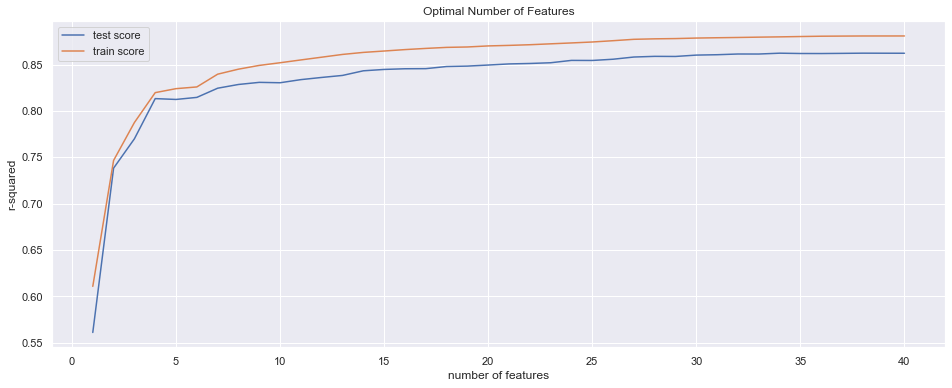

In [669]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

### Now we can choose the optimal value of number of features and build a final model.

In [670]:
# final model
n_features_optimal = 30

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, y_train)
# predict prices of X_train
y_train_pred = rfe.predict(X_train)
r2 = r2_score(y_train, y_train_pred)
print (r2)
# predict prices of X_test
y_pred = rfe.predict(X_test)
r2 = r2_score(Y_test, y_pred)
print(r2)

0.8777713540580514
0.807375220582949


In [671]:
rfe.estimator_.coef_

array([ 0.16892846,  0.02412145,  0.0931556 ,  0.31438323,  0.07161411,
        0.021588  , -0.03689526, -0.01741739, -0.02151312, -0.01921552,
       -0.03840289, -0.02176386, -0.03678073, -0.03334771, -0.03070955,
       -0.03658844,  0.03224883,  0.02402708, -0.05651328, -0.05909081,
       -0.02996381, -0.0311062 ,  0.05612653, -0.0211385 , -0.02458236,
       -0.05185281, -0.028437  , -0.05586567, -0.05758621, -0.06198933])

### It is more or less same for 41 parameters Vs 30 parameters , training or test score.  but 32-33 seems to fetch best test score

In [672]:
# tuples of (feature name, whether selected, ranking)
# note that the 'rank' is > 1 for non-selected features
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('OverallQual', True, 1),
 ('YearRemodAdd', True, 1),
 ('BsmtFinSF1', True, 1),
 ('GrLivArea', True, 1),
 ('GarageArea', True, 1),
 ('WoodDeckSF', True, 1),
 ('Neighborhood_Blueste', True, 1),
 ('Neighborhood_BrDale', True, 1),
 ('Neighborhood_BrkSide', True, 1),
 ('Neighborhood_ClearCr', False, 3),
 ('Neighborhood_CollgCr', True, 1),
 ('Neighborhood_Crawfor', False, 12),
 ('Neighborhood_Edwards', True, 1),
 ('Neighborhood_Gilbert', True, 1),
 ('Neighborhood_IDOTRR', True, 1),
 ('Neighborhood_MeadowV', False, 2),
 ('Neighborhood_Mitchel', True, 1),
 ('Neighborhood_NAmes', True, 1),
 ('Neighborhood_NPkVill', False, 5),
 ('Neighborhood_NWAmes', True, 1),
 ('Neighborhood_NoRidge', True, 1),
 ('Neighborhood_NridgHt', True, 1),
 ('Neighborhood_OldTown', True, 1),
 ('Neighborhood_SWISU', True, 1),
 ('Neighborhood_Sawyer', True, 1),
 ('Neighborhood_SawyerW', True, 1),
 ('Neighborhood_Somerst', False, 11),
 ('Neighborhood_StoneBr', True, 1),
 ('Neighborhood_Timber', False, 4),
 ('Neighborhood

### Let's bring down parameters and try Ridge and Lasso !!

In [673]:
# Some of the categorical vairables have high P value , lets drop the variable if some of them have high p value 
# Lets drop columns with all false and also in particular if few of the categorical variables are flse , lets drop whole variable itself.

drop_columns=["HeatingQC"]
# drop the columns needed to be dropped
houses_cleaned=houses_cleaned.drop(drop_columns,axis=1)
## Since we have lots of categorical variable , lets check them now before Encoding all of them.
categorical_columns=houses_cleaned.select_dtypes(include=['object']).columns.tolist()

houses_updated=houses_cleaned
for i in categorical_columns:
    encoding=pd.get_dummies(houses_cleaned[i],prefix=i,drop_first=True)
    # concatentate the 2 data sets now
    houses_updated=pd.concat([houses_updated,encoding],axis=1)
    houses_updated=houses_updated.drop(i,axis=1)

# We can do data transformation encoding for all cataegorical variables and then select the features or do RFE first and do encoding only on selected features.
# Lets do RFE first
    ## train-test 70-30 split
houses_train, houses_test = train_test_split(houses_updated, 
                                     train_size = 0.7, 
                                     test_size = 0.3, 
                                     random_state = 100)

# rescale the features
scaler = MinMaxScaler()

# apply scaler() to all the numeric columns 
numeric_vars = houses_updated.select_dtypes(include=np.number).columns.tolist()
houses_train[numeric_vars] = scaler.fit_transform(houses_train[numeric_vars])

# divide into X_train, y_train, X_test, y_test
y_train = houses_train.pop('SalePrice')
X_train = houses_train
numeric_vars = houses_test.select_dtypes(include=np.number).columns.tolist()
X_test= houses_test
X_test[numeric_vars]=scaler.transform(X_test[numeric_vars])
Y_test = X_test.pop('SalePrice')
# add constant
X_train_sm= sm.add_constant(X_train)
X_train_sm.head()


# create 2nd model 
lr = sm.OLS(y_train , X_train_sm)

# fit the model
model = lr.fit()
model.summary()

X_test_sm = sm.add_constant(X_test)


In [674]:
# predict y test pred
y_test_pred = model.predict(X_test_sm)
test_residual=y_test - y_test_pred
r2score = r2_score(y_true=Y_test , y_pred = y_test_pred)
r2score


0.8087041997268792

In [675]:
y_pred_train = model.predict(X_train_sm)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(Y_test, y_test_pred)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(Y_test - y_test_pred))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(Y_test, y_test_pred)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.8784205614865356
0.8087041997268792
1.4465881563919996
0.8781607182704961
0.0015052946476503638
0.002131458054054602


## Ridge and Lasso Regression

Let's now try predicting car prices, a dataset used in simple linear regression, to perform ridge and lasso regression.

## Ridge Regression

In [676]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 15
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 
#https://scikit-learn.org/stable/modules/model_evaluation.html

Fitting 15 folds for each of 28 candidates, totalling 420 fits


GridSearchCV(cv=15, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [677]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 1.0}


In [678]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = float(model_cv.best_params_['alpha'])
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 1.68815579e-01  2.51376192e-02  9.20468584e-02  2.84994603e-01
  7.69744130e-02  2.68785663e-02 -1.56302677e-02 -1.19171960e-02
 -1.23836509e-02  9.63539930e-04 -1.16078869e-02  1.54735292e-02
 -2.99966423e-02 -1.19440916e-02 -2.84298804e-02 -5.82128204e-03
 -2.60759860e-02 -2.23712290e-02 -1.65805446e-03 -2.58797551e-02
  4.46083991e-02  3.25362445e-02 -4.64502746e-02 -4.48245603e-02
 -2.24352860e-02 -2.26898108e-02  1.09308054e-02  6.10828856e-02
 -4.92279758e-05  7.48317109e-03 -1.98867202e-02 -2.22328655e-02
 -4.81730066e-02 -2.72056444e-02 -5.55663090e-02 -5.76565629e-02
 -6.29329587e-02]


In [679]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(Y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(Y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(Y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8774090408361241
0.8129660961987465
1.458623528579288
0.8585960960384036
0.0015178184480533694
0.002083971106889329


## Lasso

In [680]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 15 folds for each of 28 candidates, totalling 420 fits


GridSearchCV(cv=15, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [681]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [682]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [683]:
lasso.coef_

array([ 0.17667354,  0.02580821,  0.0938082 ,  0.31047522,  0.07412508,
        0.02326647, -0.        , -0.        ,  0.        ,  0.00757952,
       -0.        ,  0.02276363, -0.01562265, -0.        , -0.00971306,
        0.        , -0.01107797, -0.0083611 ,  0.        , -0.01424608,
        0.04784497,  0.03927361, -0.03398   , -0.03011645, -0.00659196,
       -0.00939549,  0.01855077,  0.06511046,  0.00553501,  0.00736121,
       -0.01418265, -0.0214491 , -0.04272539, -0.02073868, -0.04932745,
       -0.05412927, -0.05917964])

In [684]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(Y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(Y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(Y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8767596919777715
0.8078755782390131
1.4663496735536756
0.8819645803517338
0.0015258581410548134
0.0021406907290090625


In [685]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.878421,0.877409,0.876760
1,R2 Score (Test),0.808704,0.812966,0.807876
2,RSS (Train),1.446588,1.458624,1.466350
3,RSS (Test),0.878161,0.858596,0.881965
4,MSE (Train),0.038798,0.038959,0.039062
5,MSE (Test),0.046168,0.045651,0.046268


### May be due to RFE based feature selection and other ways we have removed parameters, LASSO/RIDGE is not yielding much benefit , except that Ridge is better on test r2 score.

## Lets observe the changes in the coefficients after regularization

In [686]:
betas = pd.DataFrame(index=X_train.columns)

In [687]:
betas.rows = X_train.columns

In [688]:
betas['Linear'] = model.params.values[1:]
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [689]:
pd.set_option('display.max_rows', None)
betas.sort_values

<bound method DataFrame.sort_values of                         Linear     Ridge     Lasso
OverallQual           0.165178  0.168816  0.176674
YearRemodAdd          0.023489  0.025138  0.025808
BsmtFinSF1            0.094768  0.092047  0.093808
GrLivArea             0.315547  0.284995  0.310475
GarageArea            0.071385  0.076974  0.074125
WoodDeckSF            0.023889  0.026879  0.023266
Neighborhood_Blueste -0.046570 -0.015630 -0.000000
Neighborhood_BrDale  -0.028787 -0.011917 -0.000000
Neighborhood_BrkSide -0.032247 -0.012384  0.000000
Neighborhood_ClearCr -0.019872  0.000964  0.007580
Neighborhood_CollgCr -0.029084 -0.011608 -0.000000
Neighborhood_Crawfor -0.005399  0.015474  0.022764
Neighborhood_Edwards -0.049202 -0.029997 -0.015623
Neighborhood_Gilbert -0.031634 -0.011944 -0.000000
Neighborhood_IDOTRR  -0.047510 -0.028430 -0.009713
Neighborhood_MeadowV -0.021946 -0.005821  0.000000
Neighborhood_Mitchel -0.044266 -0.026076 -0.011078
Neighborhood_NAmes   -0.041706 -0.022371 -0

### Lasso has removed only 7-8 parameters , all of which belong to neighborhood or heating category , so not much use on feature reduction for model from LASSO !!!

### Lets try and double the Alpha parameter for Ridge and Lasso and see what happens 

In [690]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = float(2.0)
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 1.68592961e-01  2.63901000e-02  9.04912722e-02  2.62278059e-01
  8.01319785e-02  2.89119461e-02 -9.80083011e-03 -1.01746250e-02
 -9.20892319e-03  4.88934815e-03 -9.32772556e-03  1.96245868e-02
 -2.70615115e-02 -8.24980239e-03 -2.57729834e-02 -4.68776085e-03
 -2.36752351e-02 -1.94078953e-02 -2.45601689e-04 -2.10373344e-02
  5.03508608e-02  3.60257995e-02 -4.23990301e-02 -3.78434012e-02
 -2.00586752e-02 -1.96710770e-02  1.30841243e-02  6.11096445e-02
  3.56486760e-03  9.00692012e-03 -1.83603321e-02 -2.02159330e-02
 -4.66437946e-02 -2.70120287e-02 -5.38196522e-02 -5.71413615e-02
 -6.34761819e-02]


In [691]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(Y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(Y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(Y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8756932689134365
0.8150883121889119
1.479038290917207
0.8488538710884153
0.0015390616971042738
0.002060324929826251


## Lasso

In [692]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =0.0005

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0005)

In [693]:
lasso.coef_

array([ 0.20497821,  0.03143523,  0.09268322,  0.29381511,  0.07504063,
        0.01611022, -0.        , -0.        ,  0.        ,  0.        ,
       -0.        ,  0.01537717, -0.00273386, -0.        , -0.        ,
        0.        , -0.        , -0.        , -0.        , -0.00263789,
        0.03772781,  0.03314645, -0.0232523 , -0.        , -0.        ,
       -0.        ,  0.00739972,  0.03664227,  0.        ,  0.        ,
       -0.        , -0.0076026 , -0.02434118, -0.01036636, -0.01531899,
       -0.03846372, -0.04573569])

In [694]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(Y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(Y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(Y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8634266209840626
0.7987837825179062
1.6249904998616285
0.9237012930731668
0.0016909370446010702
0.00224199342978924


In [695]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.878421,0.875693,0.863427
1,R2 Score (Test),0.808704,0.815088,0.798784
2,RSS (Train),1.446588,1.479038,1.624990
3,RSS (Test),0.878161,0.848854,0.923701
4,MSE (Train),0.038798,0.039231,0.041121
5,MSE (Test),0.046168,0.045391,0.047350


## Lets observe the changes in the coefficients after regularization

In [696]:
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns
betas['Linear'] = model.params.values[1:]
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
pd.set_option('display.max_rows', None)
betas.sort_values

<bound method DataFrame.sort_values of                         Linear     Ridge     Lasso
OverallQual           0.165178  0.168593  0.204978
YearRemodAdd          0.023489  0.026390  0.031435
BsmtFinSF1            0.094768  0.090491  0.092683
GrLivArea             0.315547  0.262278  0.293815
GarageArea            0.071385  0.080132  0.075041
WoodDeckSF            0.023889  0.028912  0.016110
Neighborhood_Blueste -0.046570 -0.009801 -0.000000
Neighborhood_BrDale  -0.028787 -0.010175 -0.000000
Neighborhood_BrkSide -0.032247 -0.009209  0.000000
Neighborhood_ClearCr -0.019872  0.004889  0.000000
Neighborhood_CollgCr -0.029084 -0.009328 -0.000000
Neighborhood_Crawfor -0.005399  0.019625  0.015377
Neighborhood_Edwards -0.049202 -0.027062 -0.002734
Neighborhood_Gilbert -0.031634 -0.008250 -0.000000
Neighborhood_IDOTRR  -0.047510 -0.025773 -0.000000
Neighborhood_MeadowV -0.021946 -0.004688  0.000000
Neighborhood_Mitchel -0.044266 -0.023675 -0.000000
Neighborhood_NAmes   -0.041706 -0.019408 -0